<a href="https://colab.research.google.com/github/Rut092/AI-Journey-Practice/blob/main/Article5_Random_Forest_Brest_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [1]:
# Import necessary libraries for data manipulation, visualization, and numerical operations.
# numpy: Essential for numerical operations, especially with arrays.
# matplotlib.pyplot: Used for creating static, interactive, and animated visualizations in Python.
# pandas: Provides data structures (like DataFrames) and tools for efficient data analysis and manipulation.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import necessary modules from scikit-learn for machine learning tasks.
# load_breast_cancer: A sample dataset for classification (though not used in this regression task, it was imported).
# RandomForestClassifier: An ensemble learning method for classification (not used here).
# RandomForestRegressor: An ensemble learning method for regression, crucial for our house price prediction.
# train_test_split: Utility to split datasets into training and testing subsets.
# GridSearchCV: Used for exhaustive search over specified parameter values for an estimator, optimizing hyperparameters.
# tree: Contains decision tree models and related utilities (e.g., for visualizing trees, not directly used here but often imported with tree-based models).
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree

In [3]:
# Define the URL from which the dataset will be downloaded.
# This URL points to a CSV file containing King County House Data.
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'

In [4]:
# Load the dataset from the specified URL into a pandas DataFrame.
# pd.read_csv() is used to read comma-separated values (CSV) file into a DataFrame.
df = pd.read_csv(url)

In [5]:
# Print the entire DataFrame to display all rows and columns.
# This is useful for getting a full overview of the dataset's structure and content.
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [6]:
# Display the first 5 rows of the DataFrame.
# df.head() provides a quick preview of the data, showing column names and the initial entries.
# display() function offers a richer, more interactive output in environments like Colab.
display(df.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Define a list of column names to be used as features and the target variable.
# 'bedrooms': Number of bedrooms.
# 'bathrooms': Number of bathrooms (can be non-integer).
# 'sqft_living': Square footage of the interior living space.
# 'sqft_lot': Square footage of the lot.
# 'floors': Number of floors.
# 'waterfront': Binary (0 or 1) indicating if the property has a waterfront view.
# 'view': An index from 0 to 4 of how good the view of the property was.
# 'condition': An index from 1 to 5 on the condition of the house.
# 'grade': An index from 1 to 13, where 1-3 is low, 7 is average, 11-13 is high quality.
# 'sqft_above': Square footage of the house apart from the basement.
# 'sqft_basement': Square footage of the basement.
# 'yr_built': The year the house was built.
# 'yr_renovated': The year the house was last renovated (0 if not renovated).
# 'lat': Latitude coordinate.
# 'long': Longitude coordinate.
# 'sqft_living15': Living room area in 2015 (might or might not have been renovated).
# 'sqft_lot15': Lot size area in 2015 (might or might not have been renovated).
# 'price': The target variable, the price of the house.
columns = ['bedrooms',
            'bathrooms',
            'sqft_living',
            'sqft_lot',
             'floors',
             'waterfront',
             'view',
             'condition',
             'grade',
             'sqft_above',
             'sqft_basement',
             'yr_built',
             'yr_renovated',
             'lat',
             'long',
             'sqft_living15',
             'sqft_lot15',
             'price']

In [8]:
# Filter the DataFrame to include only the columns specified in the 'columns' list.
# This step ensures that only relevant features and the target variable are retained for modeling.
df  = df[columns]

In [9]:
# Display the first 5 rows of the DataFrame again after column selection.
# This verifies that the DataFrame now contains only the chosen features and target.
display(df.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0


In [10]:
# Create the feature matrix (X) by dropping the 'price' column from the DataFrame.
# X will contain all the independent variables (features) used to predict the house price.
X = df.drop(columns = 'price')
# Display the first 5 rows of the feature matrix to ensure it looks as expected.
display(X.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [11]:
# Create the target vector (y) containing only the 'price' column.
# y represents the dependent variable that we want to predict.
y = df['price']
# Display the first 5 values of the target vector.
display(y.head())

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [12]:
# Split the dataset into training and testing sets using a 75/25 split ratio by default.
# X_train, y_train: Features and target for training the model.
# X_test, y_test: Features and target for evaluating the model's performance on unseen data.
# random_state=0: Ensures that the split is reproducible, meaning you get the same train/test sets every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [13]:
# Initialize the RandomForestRegressor model with specific hyperparameters.
# n_estimators=100: Specifies the number of trees in the forest. More trees generally lead to better performance but longer training time.
# max_features=1/3: Determines the number of features to consider when looking for the best split at each tree node. '1/3' means one-third of the total features.
# oob_score=True: Enables out-of-bag samples to estimate the generalization accuracy of the model. This is an internal cross-validation estimate.
# random_state=0: Controls the randomness of the bootstrapping of samples when building trees and the features considered at each split. Ensures reproducibility.
regressor = RandomForestRegressor(
    n_estimators=100,
    max_features=1/3,
    oob_score=True,  # enables out-of-bag evaluation
    random_state=0
)

In [14]:
# Train the RandomForestRegressor model using the training data (features X_train and target y_train).
# The .fit() method learns the relationships between features and the target variable.
regressor.fit(X_train, y_train)

RandomForestRegressor(max_features=0.3333333333333333, oob_score=True,
                      random_state=0)

In [15]:
# Print the Out-of-Bag (OOB) score of the trained model.
# The OOB score is an estimate of the model's generalization accuracy, computed using samples not included in the bootstrap sample for each tree.
# It's a useful metric for assessing model performance without requiring a separate validation set.
print(f"Baseline OOB score: {regressor.oob_score_:.3f}")

Baseline OOB score: 0.861


In [19]:
# Define the parameter grid for GridSearchCV.
# param_grid is a dictionary where keys are hyperparameter names and values are lists of settings to try.
# 'n_estimators': [100] - Number of trees in the forest. We are only checking 100 trees here.
# 'max_features': [None, 'sqrt', 'log2'] - The number of features to consider when looking for the best split:
#   - None: Use all features.
#   - 'sqrt': Use sqrt(n_features) features.
#   - 'log2': Use log2(n_features) features.
# 'max_depth': [None, 5, 10, 20, 30] - The maximum depth of the tree:
#   - None: Nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#   - Specific integers (5, 10, 20, 30): Limit the depth to prevent overfitting.
# 'min_samples_split': [2, 5, 10] - The minimum number of samples required to split an internal node.
# 'min_samples_leaf': [1, 2, 4] - The minimum number of samples required to be at a leaf node.
param_grid = {
    'n_estimators': [100],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 5,10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
# Initialize a new RandomForestRegressor instance with OOB scoring and random state for consistency.
regressor = RandomForestRegressor(
    oob_score=True,
    random_state=0,
)
# Initialize GridSearchCV for hyperparameter tuning.
# estimator: The model to tune (RandomForestRegressor).
# param_grid: The dictionary of hyperparameters and their values to search over.
# cv=5: Perform 5-fold cross-validation for each parameter combination.
# scoring='r2': Use the R-squared metric to evaluate the performance of each model.
# n_jobs=-1: Use all available CPU cores for parallel processing, speeding up the search.
# verbose=2: Output detailed messages about the progress of the grid search.
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2 # Added verbose parameter for progress updates
)

In [21]:
# Execute the GridSearchCV to find the best hyperparameters.
# This process will train multiple RandomForestRegressor models, evaluate them using cross-validation,
# and identify the combination of hyperparameters that yields the best R-squared score.
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             scoring='r2')

In [22]:
# Print the best hyperparameters found by GridSearchCV.
# grid_search.best_params_ returns a dictionary of the best parameter set.
print(f"Best parameters: {grid_search.best_params_}")

# Print the best R-squared score achieved with the optimal hyperparameters during cross-validation.
# grid_search.best_score_ provides the mean cross-validated score of the best estimator.
print(f"Best R^2 score: {grid_search.best_score_:.3f}")

Best parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R^2 score: 0.862


In [23]:
# Retrieve the best estimator (the model with the optimal hyperparameters) from the GridSearchCV result.
best_model = grid_search.best_estimator_

# Evaluate the final best model on the unseen test set (X_test, y_test).
# The .score() method for regressors typically returns the R-squared (R^2) score.
# This provides an unbiased estimate of the model's performance on new data.
print(f"Test R^2 score (final model): {best_model.score(X_test, y_test):.3f}")

Test R^2 score (final model): 0.889


In [25]:
# Extract feature importances from the best trained RandomForestRegressor model.
# Feature importances indicate the relative contribution of each feature to the model's predictions.
importances = best_model.feature_importances_

# Create a pandas DataFrame to display feature names alongside their importance scores.
# Sort the features by their score in descending order to easily identify the most influential ones.
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': importances
}).sort_values(by='Score', ascending=False) # Sort by most useful

In [26]:
# Print a header for the feature importance scoreboard.
print("--- Feature Purity Scoreboard ---")
# Display the DataFrame showing each feature and its calculated importance score.
# Features with higher scores contributed more to reducing impurity in the trees.
print(feature_scores)

--- Feature Purity Scoreboard ---
          Feature     Score
2     sqft_living  0.349736
8           grade  0.228907
13            lat  0.167136
14           long  0.072910
5      waterfront  0.034624
15  sqft_living15  0.032459
11       yr_built  0.026813
9      sqft_above  0.020774
3        sqft_lot  0.014922
16     sqft_lot15  0.014106
6            view  0.012797
1       bathrooms  0.007589
10  sqft_basement  0.005642
0        bedrooms  0.003274
12   yr_renovated  0.003158
7       condition  0.002936
4          floors  0.002218


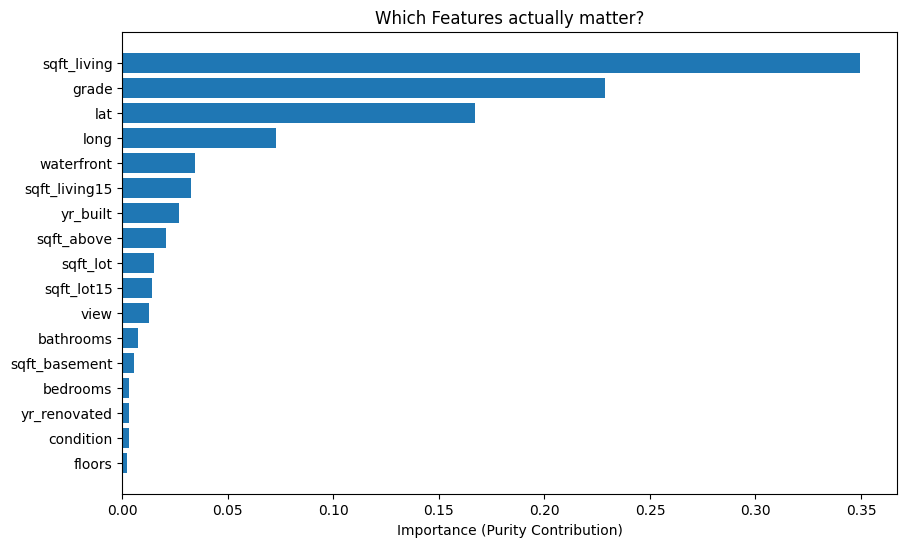

In [27]:
# Create a horizontal bar chart to visually represent feature importances.
# plt.figure(figsize=(10,6)): Sets the size of the plot for better readability.
# plt.barh(): Creates horizontal bars, with feature names on the y-axis and scores on the x-axis.
# plt.xlabel(): Labels the x-axis as 'Importance (Purity Contribution)'.
# plt.gca().invert_yaxis(): Inverts the y-axis so the most important feature appears at the top.
# plt.title(): Sets the title of the plot.
# plt.show(): Displays the generated plot.
plt.figure(figsize=(10,6))
plt.barh(feature_scores['Feature'], feature_scores['Score'])
plt.xlabel("Importance (Purity Contribution)")
plt.gca().invert_yaxis() # Highest on top
plt.title("Which Features actually matter?")
plt.show()

In [28]:
# Select features that have an importance score greater than 0.10 (5%).
# This threshold helps to identify and retain only the most impactful features for a potentially simpler and more efficient model.
useful_features = feature_scores[feature_scores['Score'] > 0.05]['Feature'].tolist()
# Create a new DataFrame 'X_reduced' containing only these highly useful features.
X_reduced = X[useful_features]

# Print a summary comparing the number of columns before and after feature reduction.
print(f"\nOriginal Columns: {X.shape[1]}")
print(f"Reduced Columns:  {X_reduced.shape[1]}")
print(f"We Kept: {useful_features}")


Original Columns: 17
Reduced Columns:  4
We Kept: ['sqft_living', 'grade', 'lat', 'long']
